In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-dataset/car_prediction_data.csv


**Importing the Dependencies**

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Data Collection and Processing**

In [3]:
# Loading the data set from csv file to pandas dataframe

df=pd.read_csv("/kaggle/input/car-price-prediction-dataset/car_prediction_data.csv")

In [4]:
#Inspecting the first 5 rows of the dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Checking the number of rows and columns
df.shape

(301, 9)

In [6]:
# Explore the more Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Checking the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# Checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


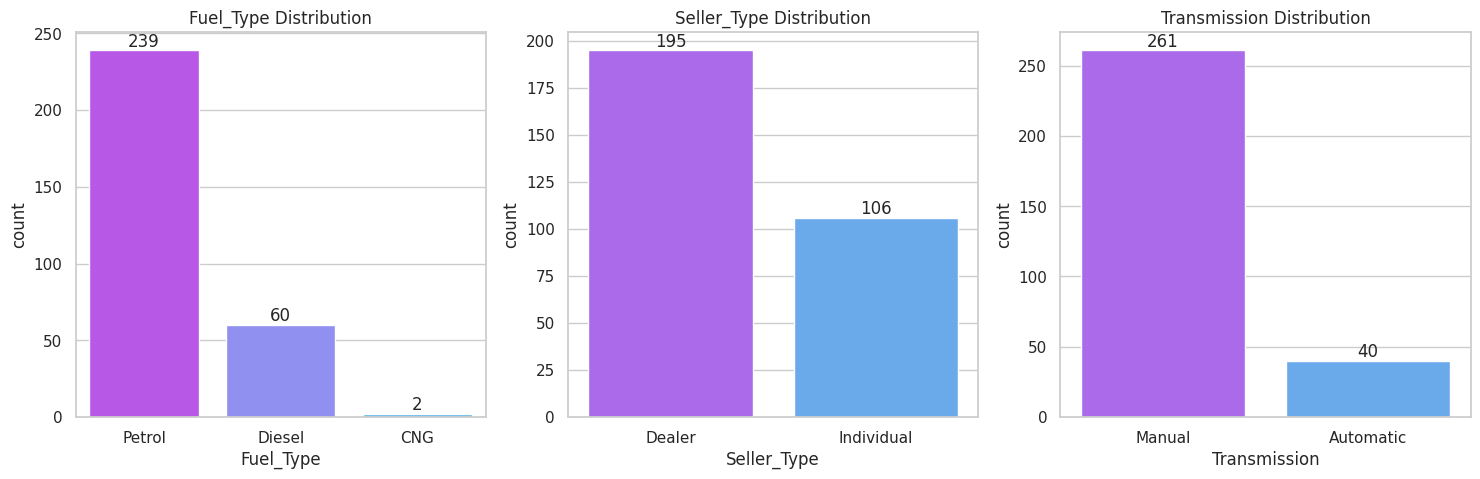

In [9]:
sns.set(style="whitegrid")
fig , axes=plt.subplots(1,3 ,figsize=(18,5))

ax=sns.countplot(data=df, x="Fuel_Type",ax=axes[0],palette="cool_r")
axes[0].set_title("Fuel_Type Distribution")
for bars in ax.containers:
    ax.bar_label(bars)
    
ax=sns.countplot(data=df,x="Seller_Type",ax=axes[1],palette="cool_r")
axes[1].set_title("Seller_Type Distribution")
for bars in ax.containers:
    ax.bar_label(bars)
    
ax=sns.countplot(data=df,x="Transmission",ax=axes[2],palette="cool_r")
axes[2].set_title("Transmission Distribution")
for bars in ax.containers:
    ax.bar_label(bars)

**Encoding Categorical Data**

In [10]:
# Encoding Fuel_Type
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

#Encoding Seller_Type
df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

#Encoding Transmission
df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

/tmp/ipykernel_18/824032626.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
/tmp/ipykernel_18/824032626.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
/tmp/ipykernel_18/824032626.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the f

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


# Spliting the data into Training data and Test Data

In [13]:
X=df.drop(["Car_Name","Selling_Price"],axis=1)
Y=df["Selling_Price"]


In [14]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test Data

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

# Model Training

**1. Linear Regrsession Model**

In [17]:
#Loading the Linear Regression Model
Linear_Reg_Model = LinearRegression()

In [18]:
#Fit the Model
Linear_Reg_Model.fit(X_train,Y_train)

LinearRegression()

In [19]:
# prediction on training data
Training_Prediction = Linear_Reg_Model.predict(X_train)

**Visualize the actual prices and Predicted prices**

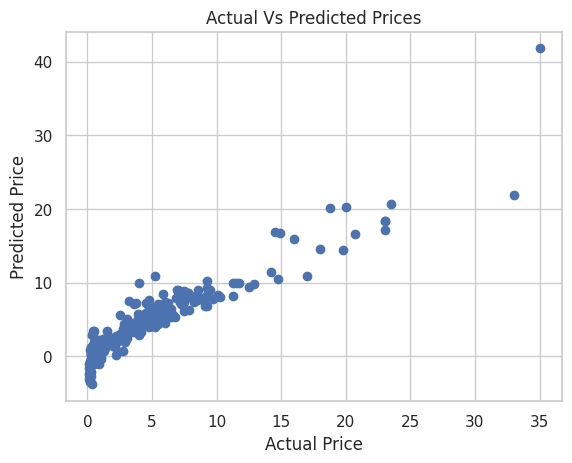

In [20]:
plt.scatter(Y_train,Training_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Prices")
plt.show()

In [21]:
# R Squared Error
error_score=metrics.r2_score(Y_train,Training_Prediction)
print("R squared Error : " , error_score)

R squared Error :  0.8799451660493711


In [22]:
# prediction on Testing data
Testing_Prediction = Linear_Reg_Model.predict(X_test)

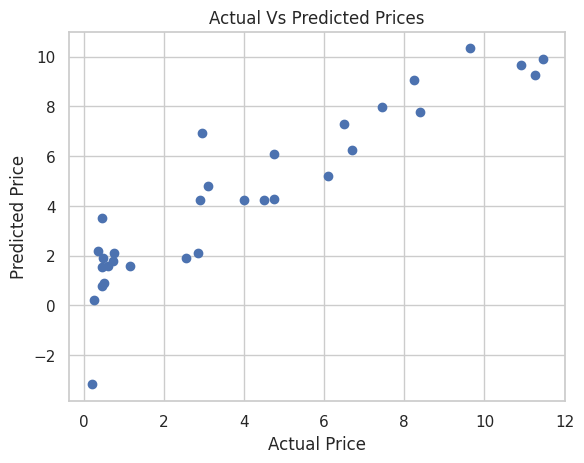

In [23]:
plt.scatter(Y_test,Testing_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Prices")
plt.show()

In [24]:
error_score=metrics.r2_score(Y_test,Testing_Prediction)
print("R squared Error : " , error_score)

R squared Error :  0.8365766715027051


**2.Lasso Regression**

In [25]:
#Loading the Linear Lasso Model
Lasso_Reg_Model = Lasso()

In [26]:
#Fit the Model
Lasso_Reg_Model.fit(X_train,Y_train)

Lasso()

In [27]:
# prediction on training data
Training_Prediction_Lasso = Lasso_Reg_Model.predict(X_train)

**Visualize the actual prices and Predicted prices**

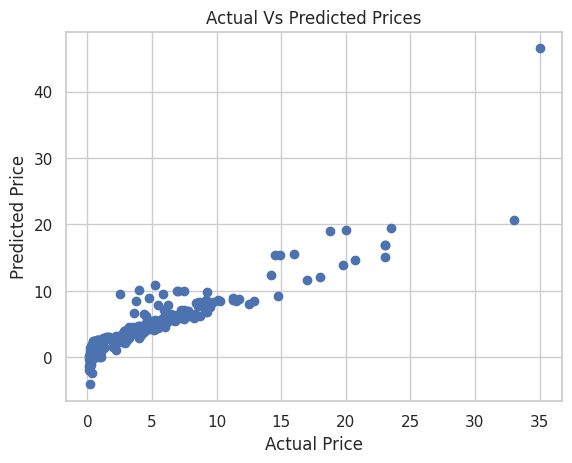

In [28]:
plt.scatter(Y_train,Training_Prediction_Lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Prices")
plt.show()

In [29]:
# R Squared Error For Lasso
error_score=metrics.r2_score(Y_train,Training_Prediction_Lasso)
print("R squared Error : " , error_score)

R squared Error :  0.8427856123435794


In [30]:
# prediction on Testing data
Testing_Prediction_Lasso = Lasso_Reg_Model.predict(X_test)

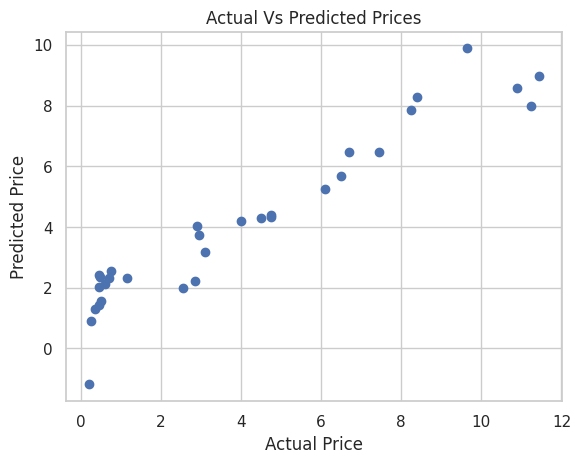

In [31]:
plt.scatter(Y_test,Testing_Prediction_Lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Prices")
plt.show()

In [32]:
error_score=metrics.r2_score(Y_test,Testing_Prediction_Lasso)
print("R squared Error : " , error_score)

R squared Error :  0.8709167941173195
